In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
energy_info = pd.read_csv(f"../data/energy_info.csv")

In [3]:
energy_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509652 entries, 0 to 3509651
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   LCLid                    object 
 2   Acorn                    object 
 3   Acorn_id                 int64  
 4   energy_sum               float64
 5   date                     object 
 6   temperatureMax           float64
 7   windBearing              int64  
 8   dewPoint                 float64
 9   cloudCover               float64
 10  windSpeed                float64
 11  pressure                 float64
 12  apparentTemperatureHigh  float64
 13  visibility               float64
 14  humidity                 float64
 15  apparentTemperatureLow   float64
 16  apparentTemperatureMax   float64
 17  uvIndex                  float64
 18  sunsetTime               object 
 19  temperatureLow           float64
 20  temperatureMin           float64
 21  temperat

In [4]:
energy_info = energy_info.drop(['Unnamed: 0'], axis=1)

## Feature engineering

In [5]:
def convert_to_date_type(df, col_name):
    return pd.to_datetime(df[col_name])

In [6]:
date_cols = ['date', 'sunsetTime', 'sunriseTime']
for col in date_cols:
    energy_info[col] = convert_to_date_type(energy_info, col)

In [7]:
energy_info.describe()

,Acorn_id,energy_sum,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,apparentTemperatureMin,moonPhase
count,3.509652e+06,3.509622e+06,3509652,3.509652e+06,3.509652e+06,3.509652e+06,3.504554e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.504554e+06,3509652,3.509652e+06,3.509652e+06,3.509652e+06,3509652,3.509652e+06,3.509652e+06
mean,8.642326e+00,1.012373e+01,2013-03-27 21:28:42.767728128,1.413323e+01,1.948034e+02,6.931818e+00,4.814077e-01,3.590107e+00,1.012955e+03,1.316583e+01,1.129270e+01,7.795691e-01,6.641368e+00,1.337893e+01,2.674502e+00,2013-03-28 15:31:38.490673920,8.152914e+00,7.868356e+00,1.400748e+01,2013-03-28 03:28:51.738979328,6.314622e+00,5.043763e-01
min,1.000000e+00,0.000000e+00,2011-11-23 00:00:00,-6.000000e-02,0.000000e+00,-7.840000e+00,0.000000e+00,2.000000e-01,9.792500e+02,-6.460000e+00,1.480000e+00,4.300000e-01,-8.880000e+00,-4.110000e+00,0.000000e+00,2011-11-23 16:03:50,-5.640000e+00,-5.640000e+00,-8.100000e-01,2011-11-23 07:32:38,-8.880000e+00,0.000000e+00
25%,5.000000e+00,4.682000e+00,2012-10-21 00:00:00,9.420000e+00,1.230000e+02,3.280000e+00,3.500000e-01,2.380000e+00,1.006770e+03,6.980000e+00,1.048000e+01,7.100000e-01,1.580000e+00,7.300000e+00,1.000000e+00,2012-10-21 16:55:53,4.170000e+00,3.680000e+00,9.170000e+00,2012-10-21 06:36:25,1.300000e+00,2.600000e-01
50%,6.000000e+00,7.815000e+00,2013-03-30 00:00:00,1.327000e+01,2.170000e+02,7.020000e+00,4.700000e-01,3.450000e+00,1.013640e+03,1.314000e+01,1.199000e+01,7.900000e-01,6.200000e+00,1.327000e+01,2.000000e+00,2013-03-30 18:30:51,8.160000e+00,7.600000e+00,1.314000e+01,2013-03-30 05:41:12,5.620000e+00,5.100000e-01
75%,1.200000e+01,1.256900e+01,2013-09-10 00:00:00,1.882000e+01,2.520000e+02,1.078000e+01,6.100000e-01,4.570000e+00,1.019880e+03,1.881000e+01,1.281000e+01,8.600000e-01,1.224000e+01,1.882000e+01,4.000000e+00,2013-09-10 18:28:49,1.224000e+01,1.207000e+01,1.881000e+01,2013-09-10 05:28:55,1.207000e+01,7.500000e-01
max,1.800000e+01,3.325560e+02,2014-02-28 00:00:00,3.240000e+01,3.590000e+02,1.777000e+01,1.000000e+00,9.960000e+00,1.040920e+03,3.242000e+01,1.534000e+01,9.800000e-01,2.054000e+01,3.242000e+01,7.000000e+00,2014-02-28 17:39:22,2.054000e+01,2.054000e+01,3.240000e+01,2014-02-28 06:49:37,2.054000e+01,9.900000e-01
std,4.869629e+00,9.129041e+00,NaN,6.538083e+00,8.904418e+01,5.010815e+00,1.907060e-01,1.693724e+00,1.056488e+01,7.694098e+00,2.324793e+00,9.709640e-02,6.288725e+00,7.507729e+00,1.893955e+00,NaN,5.053530e+00,5.085640e+00,6.627812e+00,NaN,6.312908e+00,2.872194e-01


In [8]:
def extract_date(df, date_col_name, delete_col = True):
    df[f'{date_col_name}_year'] = df[date_col_name].dt.year
    df[f'{date_col_name}_month'] = df[date_col_name].dt.month
    df[f'{date_col_name}_day'] = df[date_col_name].dt.day
    df[f'{date_col_name}_day_of_week'] = df[date_col_name].dt.dayofweek
    df[f'{date_col_name}_day_of_week_name'] = df[date_col_name].dt.day_name()
    df[f'{date_col_name}_is_weekend'] = np.where(df[f'{date_col_name}_day_of_week_name'].isin(['Sunday', 'Saturday']), 1, 0)
    df = df.drop([f'{date_col_name}_day_of_week_name'], axis=1)
    if delete_col:
        df = df.drop([date_col_name], axis=1)
    return df

def extract_time(df, time_col_name, delete_col = True):
    df[f'{time_col_name}_hour'] = df[time_col_name].dt.hour
    df[f'{time_col_name}_minute'] = df[time_col_name].dt.minute
    if delete_col:
        df = df.drop([time_col_name], axis=1)
    return df

In [9]:
energy_info = extract_date(energy_info, 'date', False)
energy_info = extract_time(energy_info, 'sunsetTime')
energy_info = extract_time(energy_info, 'sunriseTime')

In [10]:
holidays = pd.read_csv(f"../data/archive/uk_bank_holidays.csv")
holidays['date'] = convert_to_date_type(holidays, 'Bank holidays')
holidays = holidays.drop('Bank holidays', axis=1)
holidays

,Type,date
0,Boxing Day,2012-12-26
1,Christmas Day,2012-12-25
2,Summer bank holiday,2012-08-27
3,Queen?s Diamond Jubilee (extra bank holiday),2012-05-06
4,Spring bank holiday (substitute day),2012-04-06
5,Early May bank holiday,2012-07-05
6,Easter Monday,2012-09-04
7,Good Friday,2012-06-04
8,New Year?s Day (substitute day),2012-02-01
9,Boxing Day,2013-12-26


In [22]:
pd.to_datetime('2012-12-20') in holidays['date'].tolist()

False

In [43]:
def is_holiday(df):
    # try:
    #     print('been here')
    #     print(df['date'])
        # if is_weekend == 1: return 1
    if df['date'] in holidays['date'].tolist() or df['date_is_weekend'] == 1: return 1
    return 0
        # if df['date'] in holidays['date'].tolist(): return 1
    # except:
    #     print('error')
    #     return df
    #     return None
    # return df
# energy_info['is_holiday'] = energy_info['date_is_weekend']
energy_info['is_holiday'] = energy_info.loc[:, ['date', 'date_is_weekend']].apply(is_holiday, axis=1)
energy_info

,LCLid,Acorn,Acorn_id,energy_sum,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,date_year,date_month,date_day,date_day_of_week,date_is_weekend,sunsetTime_hour,sunsetTime_minute,sunriseTime_hour,sunriseTime_minute,is_holiday
0,MAC000002,ACORN-A,1,7.098,2012-10-12,14.72,250,7.08,0.48,5.42,1005.33,13.99,13.07,0.75,6.47,14.73,2.0,6.47,8.51,13.99,7.12,0.89,2012,10,12,4,0,17,14,6,21,0
1,MAC000002,ACORN-A,1,11.087,2012-10-13,11.53,252,6.15,0.29,2.18,1004.92,11.53,12.94,0.84,1.64,11.53,2.0,2.81,6.41,11.53,4.01,0.92,2012,10,13,5,1,17,12,6,22,1
2,MAC000002,ACORN-A,1,13.223,2012-10-14,12.32,300,4.10,0.20,2.36,1002.50,12.32,11.86,0.80,2.83,12.32,2.0,4.09,2.81,12.32,1.64,0.96,2012,10,14,6,1,17,10,6,24,1
3,MAC000002,ACORN-A,1,10.257,2012-10-15,13.03,220,6.39,0.31,2.97,1002.67,13.03,12.17,0.84,7.15,13.03,1.0,9.81,4.09,13.03,2.83,0.99,2012,10,15,0,0,17,8,6,26,0
4,MAC000002,ACORN-A,1,9.769,2012-10-16,14.74,226,6.91,0.39,5.37,1000.80,14.74,12.59,0.74,7.41,14.74,1.0,8.80,9.06,14.74,7.15,0.03,2012,10,16,1,0,17,6,6,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509647,MAC002774,ACORN-U,18,0.128,2014-02-02,9.30,221,2.63,0.22,4.75,1005.39,6.48,12.89,0.72,2.02,6.48,1.0,4.97,5.79,9.30,3.21,0.10,2014,2,2,6,1,16,52,7,38,1
3509648,MAC002774,ACORN-U,18,0.114,2014-02-03,7.99,139,2.86,0.47,4.92,1003.89,4.59,12.50,0.79,1.12,4.59,1.0,4.22,4.97,7.99,1.96,0.13,2014,2,3,0,0,16,53,7,37,0
3509649,MAC002774,ACORN-U,18,0.142,2014-02-04,8.88,172,2.69,0.42,5.30,996.87,5.63,12.05,0.75,1.03,5.63,1.0,5.54,4.22,8.88,1.12,0.17,2014,2,4,1,0,16,55,7,35,0
3509650,MAC002774,ACORN-U,18,0.124,2014-02-05,9.64,193,4.06,0.73,7.86,982.20,5.86,10.91,0.77,3.56,5.86,1.0,7.01,5.54,9.64,1.03,0.20,2014,2,5,2,0,16,57,7,33,0


In [53]:
energy_info.loc[(energy_info['is_holiday'] == 1) & (energy_info['date_is_weekend'] == 0)][['date', 'date_is_weekend', 'is_holiday']]

,date,date_is_weekend,is_holiday
74,2012-12-25,0,1
75,2012-12-26,0,1
81,2013-01-01,0,1
84,2013-01-04,0,1
168,2013-03-29,0,1
...,...,...,...
3509405,2013-06-05,0,1
3509487,2013-08-26,0,1
3509608,2013-12-25,0,1
3509609,2013-12-26,0,1


In [ ]:
energy_info.drop("Acorn", axis=1)

,LCLid,Acorn_id,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,date_year,date_month,date_day,date_day_of_week,date_is_weekend,sunsetTime_hour,sunsetTime_minute,sunriseTime_hour,sunriseTime_minute
0,MAC000002,1,7.098,14.72,250,7.08,0.48,5.42,1005.33,13.99,13.07,0.75,6.47,14.73,2.0,6.47,8.51,13.99,7.12,0.89,2012,10,12,4,0,17,14,6,21
1,MAC000002,1,11.087,11.53,252,6.15,0.29,2.18,1004.92,11.53,12.94,0.84,1.64,11.53,2.0,2.81,6.41,11.53,4.01,0.92,2012,10,13,5,1,17,12,6,22
2,MAC000002,1,13.223,12.32,300,4.10,0.20,2.36,1002.50,12.32,11.86,0.80,2.83,12.32,2.0,4.09,2.81,12.32,1.64,0.96,2012,10,14,6,1,17,10,6,24
3,MAC000002,1,10.257,13.03,220,6.39,0.31,2.97,1002.67,13.03,12.17,0.84,7.15,13.03,1.0,9.81,4.09,13.03,2.83,0.99,2012,10,15,0,0,17,8,6,26
4,MAC000002,1,9.769,14.74,226,6.91,0.39,5.37,1000.80,14.74,12.59,0.74,7.41,14.74,1.0,8.80,9.06,14.74,7.15,0.03,2012,10,16,1,0,17,6,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509647,MAC002774,18,0.128,9.30,221,2.63,0.22,4.75,1005.39,6.48,12.89,0.72,2.02,6.48,1.0,4.97,5.79,9.30,3.21,0.10,2014,2,2,6,1,16,52,7,38
3509648,MAC002774,18,0.114,7.99,139,2.86,0.47,4.92,1003.89,4.59,12.50,0.79,1.12,4.59,1.0,4.22,4.97,7.99,1.96,0.13,2014,2,3,0,0,16,53,7,37
3509649,MAC002774,18,0.142,8.88,172,2.69,0.42,5.30,996.87,5.63,12.05,0.75,1.03,5.63,1.0,5.54,4.22,8.88,1.12,0.17,2014,2,4,1,0,16,55,7,35
3509650,MAC002774,18,0.124,9.64,193,4.06,0.73,7.86,982.20,5.86,10.91,0.77,3.56,5.86,1.0,7.01,5.54,9.64,1.03,0.20,2014,2,5,2,0,16,57,7,33


In [ ]:
energy_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509652 entries, 0 to 3509651
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   LCLid                    object 
 1   Acorn                    object 
 2   Acorn_id                 int64  
 3   energy_sum               float64
 4   temperatureMax           float64
 5   windBearing              int64  
 6   dewPoint                 float64
 7   cloudCover               float64
 8   windSpeed                float64
 9   pressure                 float64
 10  apparentTemperatureHigh  float64
 11  visibility               float64
 12  humidity                 float64
 13  apparentTemperatureLow   float64
 14  apparentTemperatureMax   float64
 15  uvIndex                  float64
 16  temperatureLow           float64
 17  temperatureMin           float64
 18  temperatureHigh          float64
 19  apparentTemperatureMin   float64
 20  moonPhase                float64
 21  date_yea

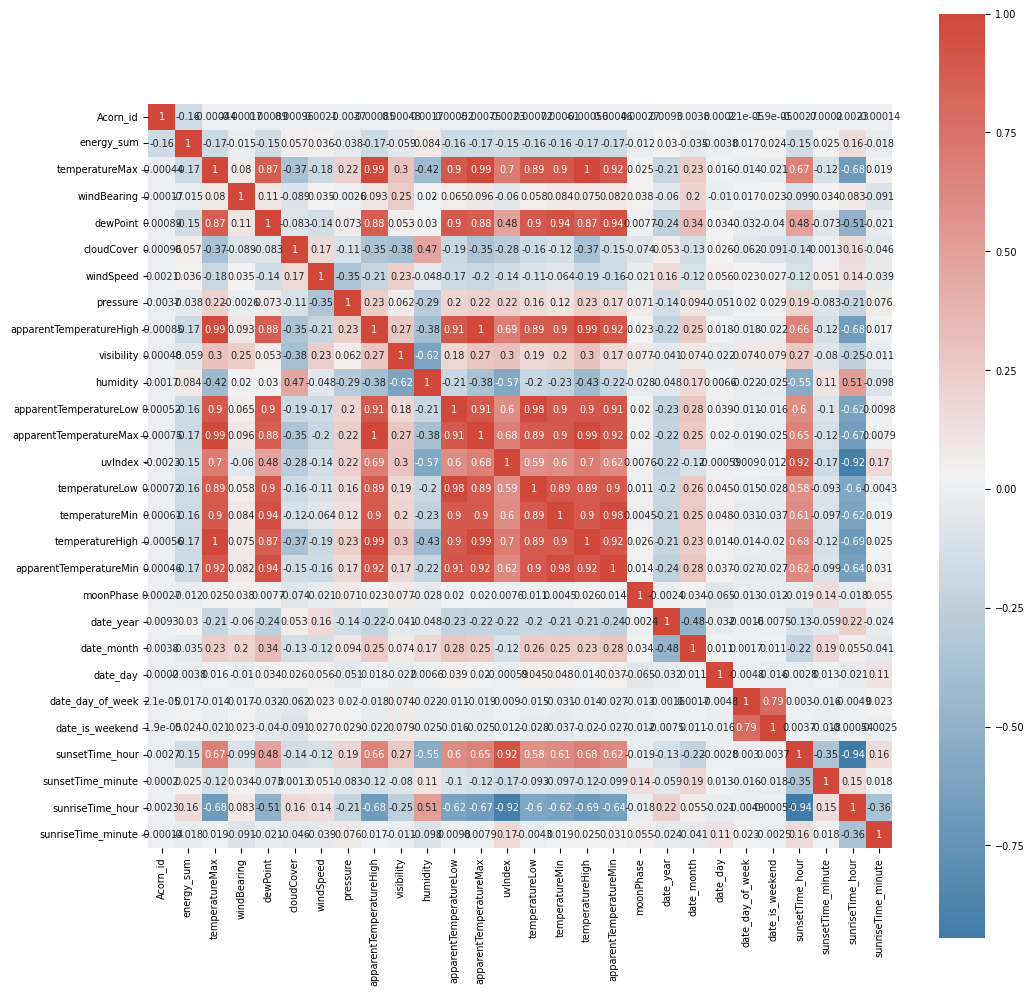

In [ ]:
corrMatrix = energy_info[energy_info.select_dtypes(include=['float64', 'int64', 'int32']).columns].corr()
size = 12
plt.figure(figsize =(size, size))
plt.rc('font', size=7)
plt.rc('axes', labelsize=7, titlesize=7)
cmap = sns.diverging_palette(-3000, 15, as_cmap=True)
fig = sns.heatmap(corrMatrix , annot=True , square=True ,cmap=cmap)

let's get rid of features higly corelated to eachother

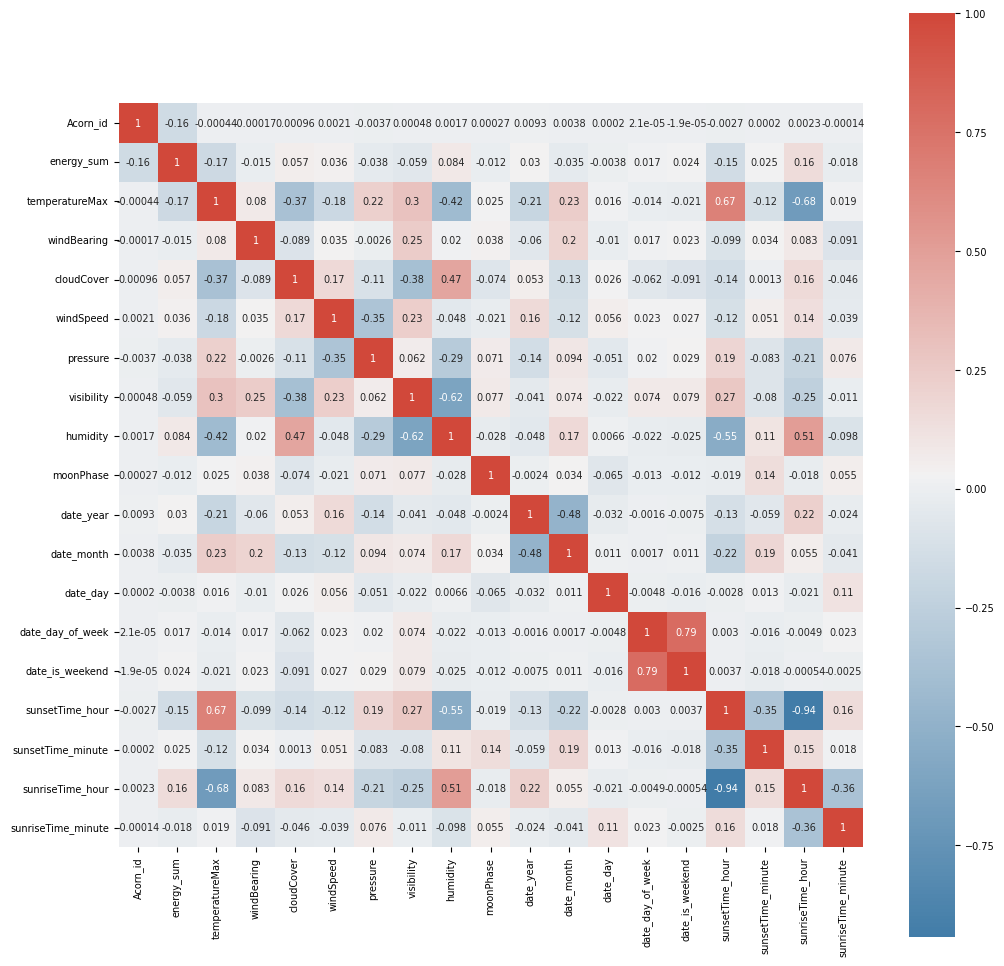

In [ ]:
df = energy_info.drop(['temperatureHigh', 'apparentTemperatureMin', 'temperatureLow', 'apparentTemperatureMax', 'apparentTemperatureLow', 'apparentTemperatureHigh', 'dewPoint', 'temperatureMin', 'uvIndex'], axis=1)
corrMatrix = df[df.select_dtypes(include=['float64', 'int64', 'int32']).columns].corr()
size = 12
plt.figure(figsize =(size, size))
plt.rc('font', size=7)
plt.rc('axes', labelsize=7, titlesize=7)
cmap = sns.diverging_palette(-3000, 15, as_cmap=True)
fig = sns.heatmap(corrMatrix , annot=True , square=True ,cmap=cmap)

In [ ]:
energy_info['is_holiday'] = 